In [3]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [4]:
#Fonctions de Haar Directe 1D une itération

def Haar1d(n,u):
    v= np.zeros((n),float)
    v= np.copy(u)
    s= (2.0)
    w= np.zeros((n))
    m=n
    m= int(np.floor(m/2))
    w[0:m] = (v[0:2*m-1:2] + v[1:2*m:2])/s
    w[m:m+m] = (v[0:2*m-1:2] - v[1:2*m:2])/s
    v[0:m+m:1] = w[0:m+m:1]

    return v

#Fonctions de Haar Inverse 1D une itération
        
def Haar_inv1d(n,u):
	v= np.zeros((n),float)
	v= np.copy(u)
	w= np.zeros((n))
	m=int(n/2)
	w[0:2*m:2] = ( v[0:m] + v[m:2*m])
	w[1:2*m:2] = ( v[0:m] - v[m:2*m])
	v[0:2*m] = w[0:2*m]               
	return v

In [5]:
#Fonctions de Haar Directe 2D

def Haar2d(n,u):
    v = np.copy(u)
    w = np.zeros((n,n),float)
    m = n
    while(1<m):
        for k in range(0,m):
            w[k,:] = Haar1d(m,v[k,:])
        v = np.copy(w)
        for k in range(0,m):
            w[:,k] = Haar1d(m,v[:,k])
        v = np.copy(w)
        m = int(m/2)       
    return v

#Fonctions de Haar Inverse 2D

def Haar_inv2d(n,u):
    v = np.copy(u)
    w = np.zeros((n,n),float)
    m = 2
    while(m<=n): 
        for k in range(0,m): 
            w[:,k] = Haar_inv1d(m,v[:,k])
            v[:,k] = w[:,k]
        for k in range(0,m):
            w[k,:] = Haar_inv1d(m,v[k,:])
            v[k,:] = w[k,:]
        m = 2*m       
    return v

In [6]:
# Fonction Quadratique Directe 1D une itération

def Quad1d(n,u):
    v= np.zeros((n),float)
    v=np.copy(u)
    w=np.copy(u)
    m=n    
    vChap=np.zeros((n),float)
    i=1
    w[0: int(m/2)] = (v[0:m-1:2]+ v[1:m:2])/2
    w[int(m/2): m] = (v[0:m-1:2]- v[1:m:2])/2  
    w[1: int(m/2)-1] = (v[2:m-2:2]+ v[3:m-1:2])/2
    if (m/2)>=2 :
        vChap[2:m-2:2]= w[1: int(m/2)-1] - (1/8) * (w[0:int(m/2)-2] - w[2: int(m/2)])
    w[1+int(m/2): m-1] = (v[2:m-2:2]- vChap[2:m-2:2])       
    v[0:m] = w[0:m]
    m= int(m/2)   
    i=i+1

    return v

# Fonction Quadratique Inverse 1D une itération

def Quad_Inv1d(n,u):
    v=np.copy(u)
    w=np.copy(u)
    m= int(n/2)   
    vChap=np.zeros((n),float)
    i=1 
    for k in range(0,m):
        w[2*k] = v[k]+v[k+m]
        w[2*k+1] = v[k]-v[k+m]
        
    for k in range(1,m-1):
        vChap[2*k]= v[k]-(1/8)*(v[k-1]-v[k+1])            
        w[2*k]= vChap[2*k]+v[k+m]
        w[2*k+1]= 2*v[k]-w[2*k] 
    v=w
      
    return v


In [7]:
# Fonction Quadratique 2D 

def Quad2d(n,u):
    v = np.copy(u)
    w = np.zeros((n,n),float)
    m = n
    while(1<m):
        for k in range(0,m): 
            w[k,:] = Quad1d(m,v[k,:])
            v[k,:] = w[k,:]
        for k in range(0,m): 
            w[:,k] = Quad1d(m,v[:,k])
            v[:,k] = w[:,k]        
        m = int(m/2)       
    return v


# Fonction Quadratique 2D Inverse

def Quad_inv2d(n,u):
    v = np.copy(u)
    w = np.zeros((n,n),float)
    m = 1
    while(m<=n):   
        for k in range(0,m): 
            w[:,k] = Quad_Inv1d(m,v[:,k])
            v[:,k] = w[:,k]
        for k in range(0,m): 
            w[k,:] = Quad_Inv1d(m,v[k,:])
            v[k,:] = w[k,:]
        m = 2*m       
    return v


In [8]:
#Fonction Quadratique ENO 1D une itération

def QuadENO1D(n,u):
    v = np.copy(u)
    w = np.zeros((n))
    m = int(n/2)   
    for k in range (0,m) :
        w[k]= (v[2*k]+v[2*k+1])/2
        w[k+m]= (v[2*k]-v[2*k+1])/2
    for k in range(2,m-2):
        c = abs(w[k-1] - w[k]) + abs(w[k] - w[k+1])
        g = abs(w[k-1] - w[k-2]) + abs(w[k] - w[k-1])
        d = abs(w[k+1] - w[k]) + abs(w[k+2] - w[k+1])       
        minimum= min(c,d,g)
         # si c est  le minimum
        if minimum==c:
            vChap = w[k] - (1/8)*(w[k-1] - w[k+1])                        
        # si d est  le minimum
        elif minimum==d:    
            vChap = (11/8)*w[k] - (1/2)*w[k+1] + (1/8)*w[k+2]         
        # si g est  le minimum
        elif minimum==g:
            vChap = (5/8)*w[k] + (1/2)*w[k-1] - (1/8)*w[k-2]
            
        w[m+k] = v[2*k] - vChap
    v= w    
    return v


#Fonction Quadratique ENO 1D Inverse une itération

def QuadENO_inv1D(n,u):
    v = np.copy(u)
    w = np.copy(u)
    m = int(n/2)    
    for k in range(0,m):
        w[2*k]=v[k]+v[k+m]
        w[2*k+1] = 2*v[k] - w[2*k]       
    if m>=8:
        for k in range(2,m-2):
            c = abs(v[k-1] - v[k]) + abs(v[k] - v[k+1])
            g = abs(v[k-1] - v[k-2]) + abs(v[k] - v[k-1])
            d = abs(v[k+1] - v[k]) + abs(v[k+2] - v[k+1])          
            minimum= min(c,d,g)
            if minimum==c:               
                vChap = v[k] - (1/8)*(v[k-1] - v[k+1])             
            elif minimum==d:               
                vChap = (11/8)*v[k] - (1/2)*v[k+1] + (1/8)*v[k+2]               
            elif minimum==g:             
                vChap = (5/8)*v[k] + (1/2)*v[k-1] - (1/8)*v[k-2]           
            w[2*k] = vChap + v[k+m]
            w[2*k+1] = 2*v[k]-w[2*k]
    v = w
    return v

In [9]:
#Fonction Quadratique ENO 2D 

def QuadENO2D(n,u):
    v = np.copy(u)
    w = np.zeros((n,n),float)
    m = n
    while(1<m):
        for k in range (0,m):
            w[k,0:m] = QuadENO1D(m,v[k,0:m])
        v = w
        for k in range (0,m):
            w[0:m,k] = QuadENO1D(m,v[0:m,k])
        v = w
        m = int(m/2)
    return v


#Fonction Quadratique ENO 2D Inverse

def QuadENO_inv2D(n,u):
    v = np.copy(u)
    w = np.copy(u)
    m = 1
    while(m<=n):
        for k in range (0,m):
            w[0:m,k] = QuadENO_inv1D(m,v[0:m,k])
        v = w       
        for k in range (0,m):
            w[k,0:m] = QuadENO_inv1D(m,v[k,0:m])
        v = w
        m = 2*m
    return v



Dimensions : Largeur : 256 px, hauteur : 256 px  


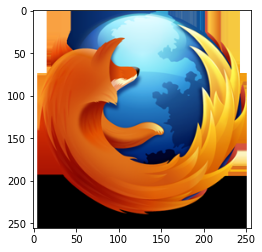

In [10]:
import cv2
#chargement de l'image
image = cv2.imread('logo256.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Récupérer et afficher la taille de l'image (en pixels)
h = image.shape[0]
w = image.shape[1]
print("Dimensions : Largeur : {} px, hauteur : {} px  ".format(w, h))

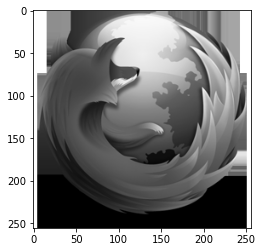

In [11]:
#Conversion en niveaux de gris
def rgb_to_gray(img):
        grayImage = np.zeros(img.shape)
        R = np.array(img[:, :, 0],float)
        G = np.array(img[:, :, 1],float)
        B = np.array(img[:, :, 2],float)

        R = (R *.299)
        G = (G *.587)
        B = (B *.114)

        Avg = (R+G+B)
        grayImage = img

        for i in range(3):
            grayImage[:,:,i] = Avg

        return grayImage

#Affichage

grayImage = rgb_to_gray(image)  
plt.imshow(grayImage)
plt.show()

In [12]:
GrayImg = np.array(grayImage [:,:,0],dtype=float)

# Appel des fonctions et construction des images Haarten 2D et Haarten 2D inverse appliqués sur l'image

Haarten2d = Haar2d(256,GrayImg)
HaartenImage = np.zeros((256,256,3))
for i in range(3):
            HaartenImage[:,:,i] = Haarten2d 
        
Haarten2d_inv = Haar_inv2d(256,Haarten2d)
HaartenImage_inv = np.zeros((256,256,3))
for i in range(3):
    HaartenImage_inv[:,:,i] = Haarten2d_inv 
    
HaartenImage_inv = np.array(HaartenImage_inv[:,:,:],dtype=int)

#*************************************************************#

# Appel des fonctions et construction des images Quadratique 2D et Quadratique 2D inverse appliqués sur l'image

Quadratique2d = Quad2d(256,GrayImg)
QuadratiqueImage = np.zeros((256,256,3))
for i in range(3):
            QuadratiqueImage[:,:,i] = Quadratique2d 
        
Quadratique2d_inv = Quad_inv2d(256,Quadratique2d)
QuadratiqueImage_inv = np.zeros((256,256,3))

for i in range(3):
    QuadratiqueImage_inv[:,:,i] = Quadratique2d_inv 
        
QuadratiqueImage_inv = np.array(QuadratiqueImage_inv[:,:,:],dtype=int)

#*************************************************************#
# Appel des fonctions et construction des images Quadratique ENO 2D et Quadratique ENO 2D inverse appliqués sur l'image

QuadratiqueENO2D = QuadENO2D(256,GrayImg)
QuadratiqueImageENO = np.zeros((256,256,3))
for i in range(3):
            QuadratiqueImageENO[:,:,i] = QuadratiqueENO2D 
        
Quadratique2dENO_inv = QuadENO_inv2D(256,QuadratiqueENO2D)
QuadratiqueImageENO_inv = np.zeros((256,256,3))

for i in range(3):
    QuadratiqueImageENO_inv[:,:,i] = Quadratique2dENO_inv 
        
QuadratiqueImageENO_inv = np.array(QuadratiqueImageENO_inv[:,:,:],dtype=int)           

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


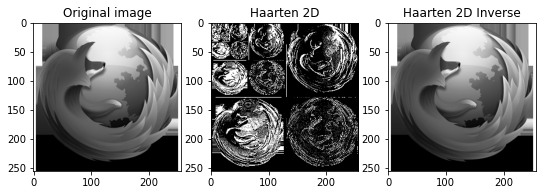

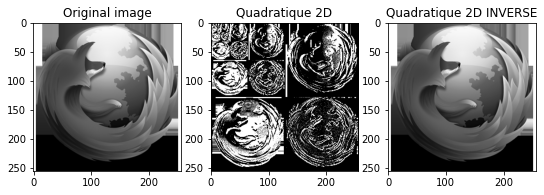

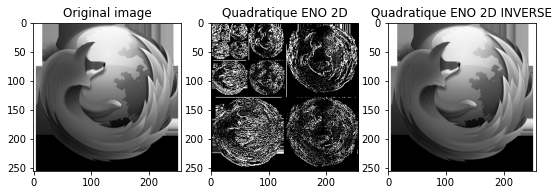

In [13]:
#Affichage des resultats des trois transformés

#Haarten
fig = plt.figure(figsize=(9,15)) 
original = fig.add_subplot(1,3,1)
original.title.set_text('Original image')
plt.imshow(grayImage)
haarten = fig.add_subplot(1,3,2)
haarten.title.set_text('Haarten 2D')
plt.imshow(HaartenImage)
haartenInv = fig.add_subplot(1,3,3)
haartenInv.title.set_text('Haarten 2D Inverse')
plt.imshow(HaartenImage_inv)

#Quadratique
fig = plt.figure(figsize=(9,15)) 
original = fig.add_subplot(1,3,1)
original.title.set_text('Original image')
plt.imshow(grayImage)
Quadratique=fig.add_subplot(1,3,2)
Quadratique.title.set_text('Quadratique 2D')
plt.imshow(QuadratiqueImage)
Quadratique_inv=fig.add_subplot(1,3,3)
Quadratique_inv.title.set_text('Quadratique 2D INVERSE')
plt.imshow(QuadratiqueImage_inv)

#Quadratique ENO
fig = plt.figure(figsize=(9,15)) 
original = fig.add_subplot(1,3,1)
original.title.set_text('Original image')
plt.imshow(grayImage)
QuadratiqueENO=fig.add_subplot(1,3,2)
QuadratiqueENO.title.set_text('Quadratique ENO 2D')
plt.imshow(QuadratiqueImageENO)
QuadratiqueENO_inv=fig.add_subplot(1,3,3)
QuadratiqueENO_inv.title.set_text('Quadratique ENO 2D INVERSE')
plt.imshow(QuadratiqueImageENO_inv)


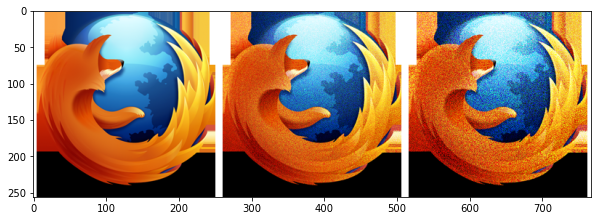

In [14]:
img = cv2.imread('logo256.png')[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)


# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
noisy1 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
noisy2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)

# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(10,10))
plt.imshow((np.hstack((img, noisy1, noisy2))))
plt.show()


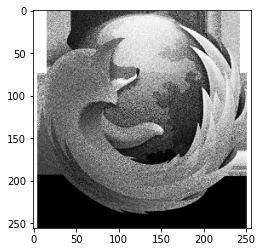

In [15]:
NoisyGrayImage = rgb_to_gray(noisy2)  
plt.imshow(NoisyGrayImage)
plt.show()

In [23]:
## Sueillage : 
def sueillage(x,T):
    y = np.copy(x)
    y[np.absolute(y) <= T] = 0
    return y

In [24]:
noisySeuillage=sueillage(NoisyGrayImage,0.05)
noisyImgSeuillage = np.zeros((256,256,3))
for i in range(3):
            noisyImgSeuillage[:,:,i] = noisySeuillage
plt.imshow(noisyImgSeuillage)


ValueError: could not broadcast input array from shape (256,256,3) into shape (256,256)

In [ ]:
print(noisyImgSeuillage )

In [ ]:
def normeL2_2D(x,y):
    if x.shape != y.shape:
        print("Les deux images ont des tailles différentes")
    else:
        n = x.shape
        v = 0
        for i in range(n[0]):
            for j in range(n[1]):
                v = v + np.square(np.absolute(x[i,j] - y[i,j]))            
        v = np.sqrt(v)
        return v


In [ ]:
Haarten12 = Haar_inv2d(256,sueillage(Haarten2d ,12))
Quad12 = Quad_inv2d(256,sueillage(Quadratique2d ,12))
QuadENO12 = QuadENO_inv2D(256,sueillage(QuadratiqueENO2D ,12))

Haarten128 = Haar_inv2d(256,sueillage(Haarten2d ,128))
Quad128 = Quad_inv2d(256,sueillage(Quadratique2d ,128))
QuadENO128 = QuadENO_inv2D(256,sueillage(QuadratiqueENO2D ,128))

In [ ]:
print(normeL2_2D(GrayImg,Haarten12))

In [ ]:
print(normeL2_2D(GrayImg,Haarten128))

In [ ]:
print(normeL2_2D(GrayImg,Quad12))

In [ ]:
print(normeL2_2D(GrayImg,Quad128))

In [ ]:
print(normeL2_2D(GrayImg,QuadENO12))

In [ ]:
print(normeL2_2D(GrayImg,QuadENO128))

In [ ]:
t=np.arange(128)
HaarTabErrors = np.zeros((128))

for i in range(128):
    HaarTabErrors[i-1] = normeL2_2D(GrayImg,Haar_inv2d(256,sueillage(Haarten2d ,i)))
    
plt.scatter(t,HaarTabErrors)
plt.title('Qualité de reconstruction de Haarten 2D en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

In [ ]:
t=np.arange(128)
QuadTabErrors = np.zeros((128))

for i in range(128):
    QuadTabErrors[i-1] = normeL2_2D(GrayImg,Quad_inv2d(256,sueillage(Quadratique2d ,i)))
    
plt.scatter(t,QuadTabErrors)
plt.title('Qualité de reconstruction de Quadratique 2D en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

In [ ]:
t=np.arange(128)
QuadENOTabErrors = np.zeros((128))

for i in range(128):
    QuadENOTabErrors[i-1] = normeL2_2D(GrayImg,QuadENO_inv2D(256,sueillage(QuadratiqueENO2D,i)))
    
plt.scatter(t,QuadENOTabErrors)
plt.title('Qualité de reconstruction de Quadratique ENO 2D en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

In [20]:
v=[[256, 128, 64, 32, 16, 8, 4, 2],[256, 128, 64, 32, 16, 8, 4, 2],[256, 128, 64, 32, 16, 8, 4, 2],[256, 128, 64, 32, 16, 8, 4, 2]
   ,[256, 128, 64, 32, 16, 8, 4, 2],[256, 128, 64, 32, 16, 8, 4, 2],[256, 128, 64, 32, 16, 8, 4, 2],[256, 128, 64, 32, 16, 8, 4, 2]]
Haar2d(8,v)

array([[63.75, 56.25, 72.  ,  4.5 , 64.  , 16.  ,  4.  ,  1.  ],
       [ 0.  ,  0.  , 72.  ,  4.5 , 64.  , 16.  ,  4.  ,  1.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , 64.  , 16.  ,  4.  ,  1.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , 64.  , 16.  ,  4.  ,  1.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])